## Importing Libraries 

In [123]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy import stats
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder

#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC

#for model selection of SVC
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

### Importing DataSet 

In [2]:
df =pd.read_csv("project_data.csv")
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


<AxesSubplot:xlabel='category'>

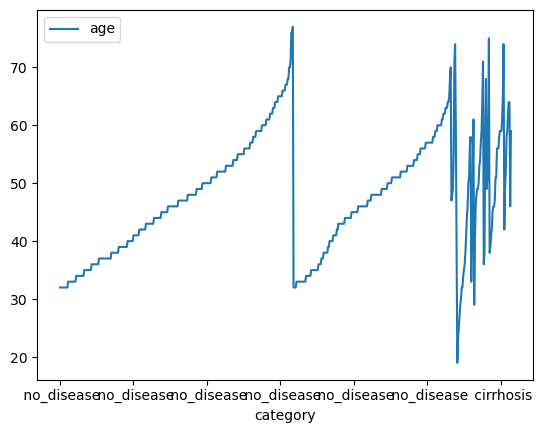

In [3]:
df.plot(x="category",y="age")

<AxesSubplot:>

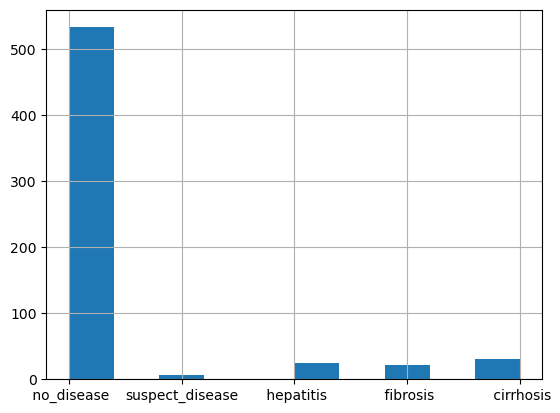

In [4]:
df["category"].hist()

### EDA 

In EDA part data Cleaning, Data Transformation, Outliers Detection, Finding Duplicated Values, and Checking for NAN Values and missing Values, Feature Scaling

In [5]:
#1.DataSet Information using Info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [6]:
# 2.Checking for dulpications

df.nunique()

category                         5
age                             49
sex                              2
albumin                        189
alkaline_phosphatase           414
alanine_aminotransferase       341
aspartate_aminotransferase     297
bilirubin                      188
cholinesterase                 407
cholesterol                    313
creatinina                     117
gamma_glutamyl_transferase     358
protein                        199
dtype: int64

In [7]:
# 3.Descriptive Analysis of Dataset like Mean,Standard Deivation, Counts 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
albumin,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
alkaline_phosphatase,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
alanine_aminotransferase,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
aspartate_aminotransferase,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
bilirubin,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
cholinesterase,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
cholesterol,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
creatinina,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10
gamma_glutamyl_transferase,615.0,39.533171,54.661071,4.50,15.700,23.30,40.200,650.90


In [8]:
# 4.Checking missing value

df.isnull().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

In [9]:
# 5.Checking for Duplicate rows

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
610    False
611    False
612    False
613    False
614    False
Length: 615, dtype: bool

In [10]:
#5.1 Count of duplicated rows

df[df.duplicated()].shape[0]

0

In [11]:
# 6.Checking for NAN Values in Dataset in Column Wise

df.isna().any()

category                       False
age                            False
sex                            False
albumin                         True
alkaline_phosphatase            True
alanine_aminotransferase        True
aspartate_aminotransferase     False
bilirubin                      False
cholinesterase                 False
cholesterol                     True
creatinina                     False
gamma_glutamyl_transferase     False
protein                        False
dtype: bool

In [12]:
# 6.1 Printing of rows which have NaN Values

df[df.isnull().any(axis=1)]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
121,no_disease,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70
319,no_disease,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,no_disease,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,no_disease,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,no_disease,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,no_disease,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,no_disease,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63
541,hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75
545,hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90


In [13]:
#6.2 Printing total No.of Null Values in the Features.

df.isnull().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

In [14]:
# Converting the datatypes of the dataset

df['protein   ']= pd.to_numeric(df['protein   '], errors='coerce').astype(float)

In [15]:
#7.Replacing "NaN" with Median in repsect their Columns

columns_to_fill = ['albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 'cholesterol']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].median())

In [16]:
df['protein   '] = df['protein   '].replace('NA', np.nan)
df['protein   '].fillna(39.533171, inplace=True)

In [17]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46,f,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [18]:
# 7.1 Checking for "Nan" in the dataset

df.isna().any()

category                       False
age                            False
sex                            False
albumin                        False
alkaline_phosphatase           False
alanine_aminotransferase       False
aspartate_aminotransferase     False
bilirubin                      False
cholinesterase                 False
cholesterol                    False
creatinina                     False
gamma_glutamyl_transferase     False
protein                        False
dtype: bool

In [19]:
# 8. LabelEncoding the "Sex" and "Category"

label_encoder = LabelEncoder()

df["category"] = label_encoder.fit_transform(df["category"])

df["sex"] = label_encoder.fit_transform(df["sex"])

In [20]:
# 8.1.Correlation Between Columns

df.corr()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
category,1.000000,-0.101460,-0.038391,0.229838,-0.014320,-0.022034,-0.601843,-0.497505,0.349835,0.279847,-0.206598,-0.405606,-0.038115
age,-0.101460,1.000000,-0.024544,-0.196842,0.168080,-0.005690,0.088666,0.032492,-0.075093,0.123789,-0.022296,0.153087,-0.147990
sex,-0.038391,-0.024544,1.000000,0.146138,-0.019808,0.161502,0.130891,0.111177,0.169111,-0.029251,0.159589,0.133276,0.042236
albumin,0.229838,-0.196842,0.146138,1.000000,-0.138015,0.001444,-0.193342,-0.221641,0.375817,0.204731,-0.001594,-0.155440,0.570291
alkaline_phosphatase,-0.014320,0.168080,-0.019808,-0.138015,1.000000,0.166320,0.059637,0.046780,0.033750,0.123197,0.149831,0.440012,-0.053535
alanine_aminotransferase,-0.022034,-0.005690,0.161502,0.001444,0.166320,1.000000,0.273333,-0.038388,0.146729,0.067716,-0.043000,0.248208,0.079704
aspartate_aminotransferase,-0.601843,0.088666,0.130891,-0.193342,0.059637,0.273333,1.000000,0.312231,-0.208536,-0.207938,-0.021387,0.491263,0.016233
bilirubin,-0.497505,0.032492,0.111177,-0.221641,0.046780,-0.038388,0.312231,1.000000,-0.333172,-0.157282,0.031224,0.217024,-0.157683
cholinesterase,0.349835,-0.075093,0.169111,0.375817,0.033750,0.146729,-0.208536,-0.333172,1.000000,0.420215,-0.011157,-0.110345,0.313928
cholesterol,0.279847,0.123789,-0.029251,0.204731,0.123197,0.067716,-0.207938,-0.157282,0.420215,1.000000,-0.047437,-0.007185,0.201000


<AxesSubplot:>

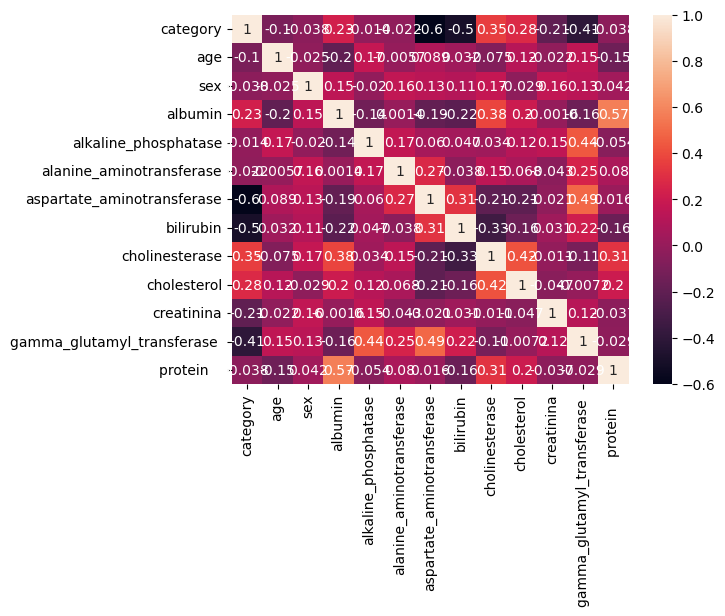

In [21]:
# 8.2.Plotting HeatMap For Correlation 

sb.heatmap(df.corr(), annot=True)

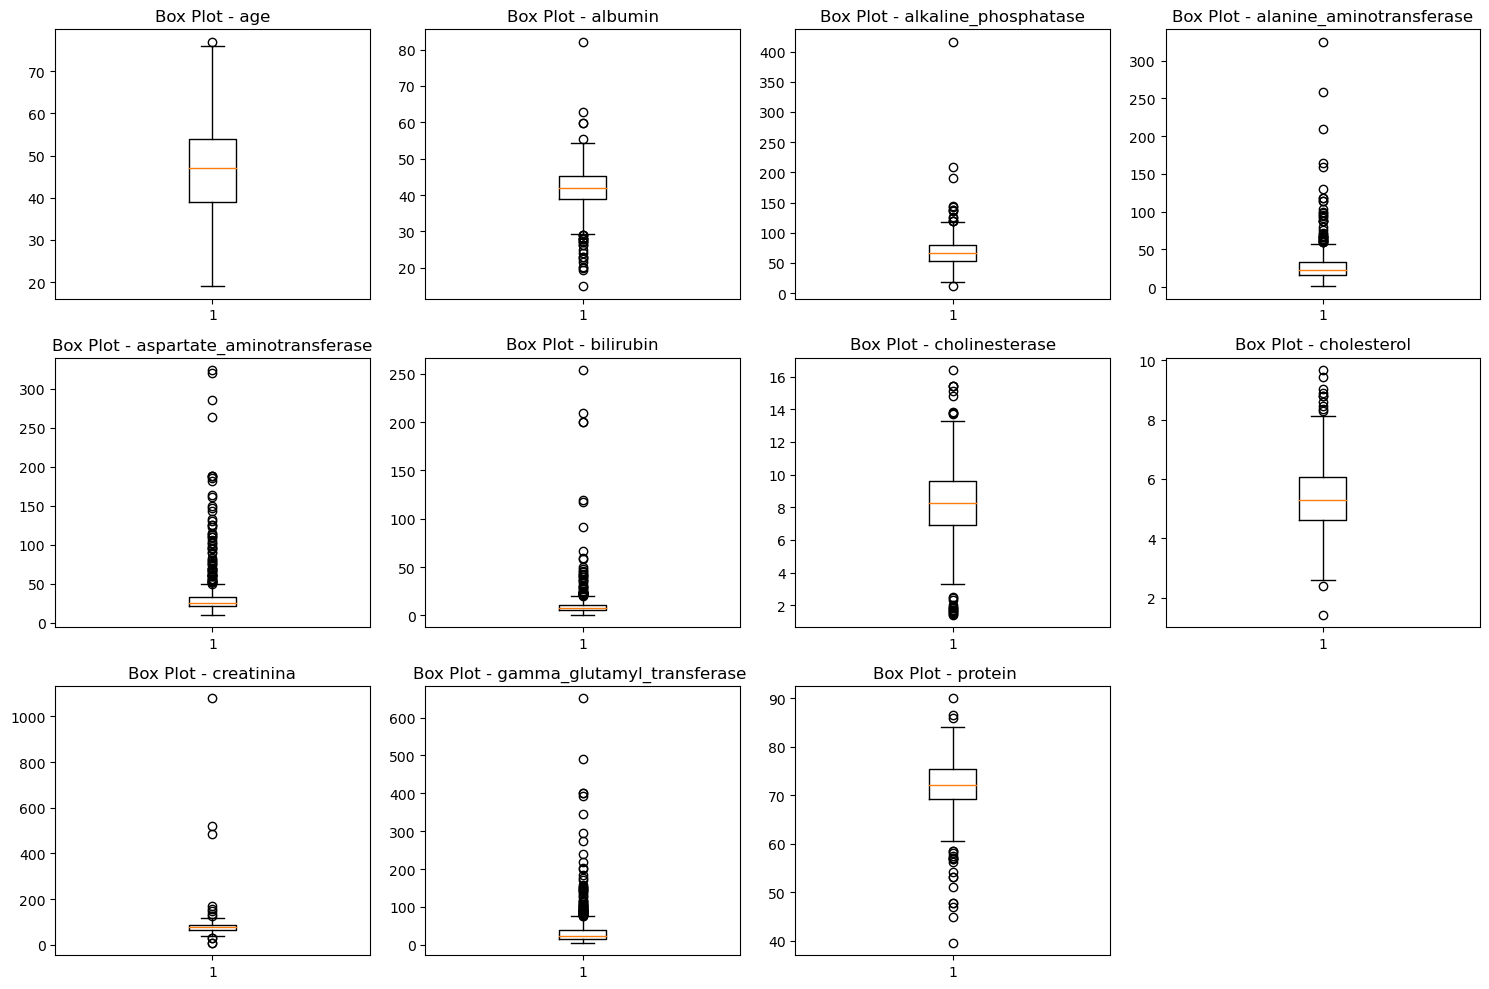

In [22]:
# 9.Checking for Outliers in "df"

plt.figure(figsize=(15, 10))

# List of columns for box plots
columns_for_boxplot = [
    'age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 
    'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 
    'cholesterol', 'creatinina','gamma_glutamyl_transferase ','protein   ']

# Create subplots in a 3x4 grid
for i, column in enumerate(columns_for_boxplot, start=1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[column])
    plt.title(f'Box Plot - {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the box plots
plt.show()


In [23]:
# 10. Treating Outliers 

# Dealing with outliers

def remove_outliers_zscore(df, columns, z_threshold=2):
    
    z_scores = df[columns].apply(stats.zscore)

    # Identify outliers based on the z-score threshold
    outliers_mask = (abs(z_scores) > z_threshold).any(axis=1)

    # Filter the DataFrame to keep only the non-outliers
    df = df[~outliers_mask]

    return df

columns = [
    'age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 
    'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 
    'cholesterol', 'creatinina','gamma_glutamyl_transferase ','protein   ']

df_without_outliers = remove_outliers_zscore(df, columns)

df_without_outliers

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.50,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.50,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.90,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.20,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.20,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,38,0,40.00,39.8,14.9,68.9,11.0,8.55,4.31,60.5,40.1,76.5
579,1,57,0,43.00,52.1,8.3,35.8,18.0,8.61,6.19,71.4,27.9,82.0
583,1,56,0,39.00,66.2,42.0,34.0,10.0,7.75,5.00,80.0,84.0,78.0
603,0,65,1,41.95,66.2,40.0,54.0,13.0,7.50,5.30,70.0,107.0,79.0


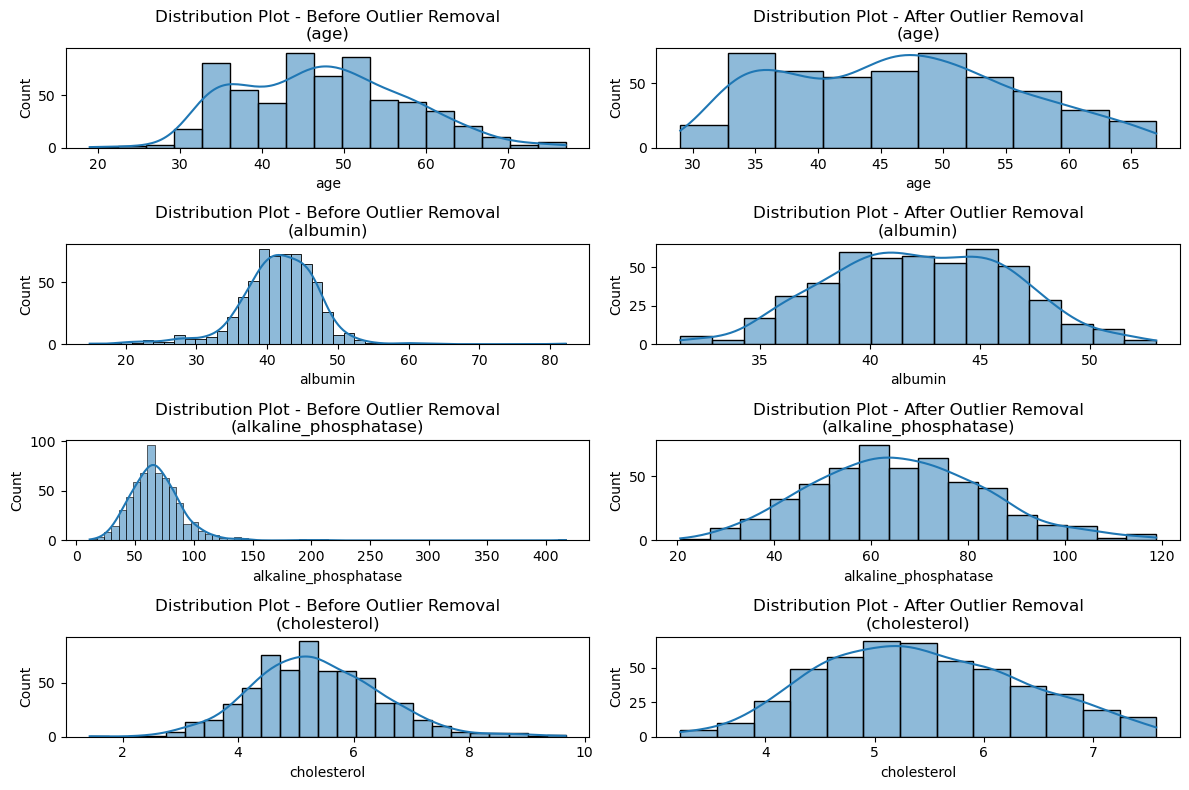

In [24]:
# Plotting Normal Distribution

column_names = ['age', 'albumin', 'alkaline_phosphatase', 'cholesterol']

# Set up subplots for each column
fig, axes = plt.subplots(nrows=len(column_names), ncols=2, figsize=(12, 8))

# Plot distribution before outlier removal
for i, column in enumerate(column_names):
    sb.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution Plot - Before Outlier Removal\n({column})')


# Plot distribution after outlier removal
for i, column in enumerate(column_names):
    sb.histplot(df_without_outliers[column], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution Plot - After Outlier Removal\n({column})')

plt.tight_layout()
plt.show()

### Auto EDA Using the Sweetviz

Auto Exploratory Data Analysis(EDA) is nothing but doing the eda part for the dataset "WITHOUT THE USER MANUAL EFFORTS."

In [25]:
# Using the sweetviz
report = sv.analyze(df_without_outliers)

# Save the report to an HTML file
report.show_html("sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
# Considering the X is for Independent Variable and y is for Target Variable(or) Dependent Variable

X = df_without_outliers.iloc[:,1:13]
y = df_without_outliers["category"]

In [27]:
X

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32,1,38.50,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.50,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.90,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.20,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.20,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
578,38,0,40.00,39.8,14.9,68.9,11.0,8.55,4.31,60.5,40.1,76.5
579,57,0,43.00,52.1,8.3,35.8,18.0,8.61,6.19,71.4,27.9,82.0
583,56,0,39.00,66.2,42.0,34.0,10.0,7.75,5.00,80.0,84.0,78.0
603,65,1,41.95,66.2,40.0,54.0,13.0,7.50,5.30,70.0,107.0,79.0


In [28]:
y

0      3
1      3
2      3
3      3
4      3
      ..
578    1
579    1
583    1
603    0
607    0
Name: category, Length: 490, dtype: int32

### Model Validation Techniques 

In [29]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=40)

In [30]:
x_train

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
493,56,0,34.7,90.3,22.7,21.6,3.5,8.07,5.45,67.0,9.0,69.4
398,45,0,39.5,92.2,18.7,19.4,3.5,8.32,5.38,85.0,15.8,72.2
87,39,1,45.7,73.4,45.5,33.8,5.0,9.07,4.41,82.0,20.6,78.9
154,46,1,49.1,60.0,19.5,20.5,3.1,7.81,5.02,102.0,20.8,70.2
560,33,0,43.0,29.6,3.8,16.7,6.0,6.88,5.72,58.8,11.5,78.2
...,...,...,...,...,...,...,...,...,...,...,...,...
498,57,0,48.4,94.4,2.5,39.6,2.3,8.84,5.30,82.0,6.4,76.8
187,49,1,39.7,77.3,20.2,19.0,8.8,7.26,4.98,84.0,74.5,65.4
7,32,1,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
250,55,1,41.5,59.5,15.4,16.2,6.8,6.35,5.22,80.0,12.4,69.9


In [31]:
x_test

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
78,38,1,38.3,81.5,65.9,35.3,14.0,11.00,5.46,80.0,45.2,68.1
189,49,1,44.7,60.2,34.6,28.5,7.1,10.14,5.68,98.0,87.0,69.8
92,40,1,47.8,68.0,17.5,22.3,7.7,9.94,6.09,88.0,23.3,73.9
415,46,0,42.3,61.9,20.0,21.8,9.7,8.80,7.09,67.0,35.0,75.2
335,34,0,37.3,36.3,19.9,28.7,3.8,3.90,4.94,86.0,4.9,70.7
...,...,...,...,...,...,...,...,...,...,...,...,...
63,37,1,50.4,48.5,19.4,27.5,11.6,5.78,4.93,90.0,27.8,75.0
512,59,0,45.1,78.0,26.0,32.4,9.0,9.85,7.32,70.0,12.9,70.9
177,48,1,43.1,83.9,20.8,27.4,18.3,9.82,6.14,90.0,16.4,74.9
76,38,1,42.0,42.7,34.8,42.2,3.3,6.10,4.74,96.0,14.6,66.7


In [32]:
y_test

78     3
189    3
92     3
415    3
335    3
      ..
63     3
512    3
177    3
76     3
44     3
Name: category, Length: 147, dtype: int32

In [33]:
y_train

493    3
398    3
87     3
154    3
560    2
      ..
498    3
187    3
7      3
250    3
373    3
Name: category, Length: 343, dtype: int32

## Data Imbalance 

In [34]:
# Printing the df["categor"] column.

df_without_outliers["category"].value_counts()


3    468
2     12
1      8
0      2
Name: category, dtype: int64

In [35]:
df_without_outliers["category"]

0      3
1      3
2      3
3      3
4      3
      ..
578    1
579    1
583    1
603    0
607    0
Name: category, Length: 490, dtype: int32

<AxesSubplot:xlabel='category', ylabel='count'>

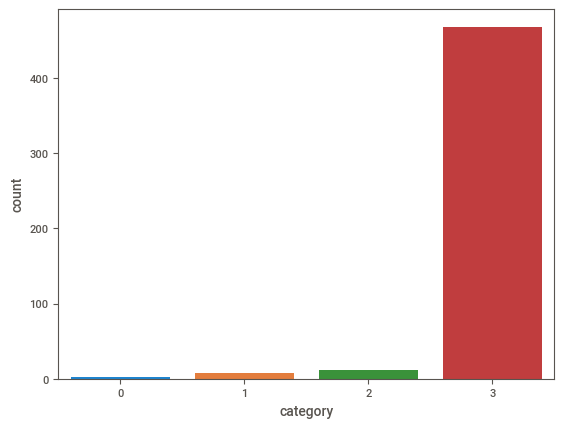

In [36]:
# Visualization of the Imbalance Data

sb.countplot(df_without_outliers["category"])

Here, the 3 value have more no.of records "1" and "2" have less no.of records 

## Handling the Imbalance Data 

The Handling of the is done with different type of method. Here, we considering the over-sampling of the data.

Over-Sampling is nothing but the when the label A is lower than the label B then we make the label A duplicates of the label A upto the label B marked value.

Here, in the problem the label-3 have more values than the label-1, label-2 for category column.

Here, we make the label-2, label-1 same number of data point equal to label-3.

In other words It generates the same number of records for the label-2 and label-1 we using "Synthetic Minority Over-Sample Techniques" (SMOTE).

In [37]:
# Initialize the SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)

# Fitting the X_train, y_train and the operation done only on the training set
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [38]:
X_resampled

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,56,0,34.700000,90.300000,22.700000,21.600000,3.500000,8.070000,5.450000,67.000000,9.000000,69.400000
1,45,0,39.500000,92.200000,18.700000,19.400000,3.500000,8.320000,5.380000,85.000000,15.800000,72.200000
2,39,1,45.700000,73.400000,45.500000,33.800000,5.000000,9.070000,4.410000,82.000000,20.600000,78.900000
3,46,1,49.100000,60.000000,19.500000,20.500000,3.100000,7.810000,5.020000,102.000000,20.800000,70.200000
4,33,0,43.000000,29.600000,3.800000,16.700000,6.000000,6.880000,5.720000,58.800000,11.500000,78.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,35,1,44.502885,33.855481,8.897115,31.899423,12.742788,10.990033,5.639481,72.044761,39.041057,71.076010
1312,34,1,45.450536,35.656019,7.949464,31.709893,10.373659,10.179791,5.468903,78.536174,36.103337,71.407688
1313,38,1,45.963862,38.666742,12.657594,46.265555,9.865049,10.142507,4.740960,70.464089,73.152741,75.233258
1314,35,0,43.878221,32.498128,8.718036,30.136776,13.025765,10.867122,5.728782,67.406563,37.056221,71.788989


In [39]:
y_resampled

0       3
1       3
2       3
3       3
4       2
       ..
1311    2
1312    2
1313    2
1314    2
1315    2
Name: category, Length: 1316, dtype: int32

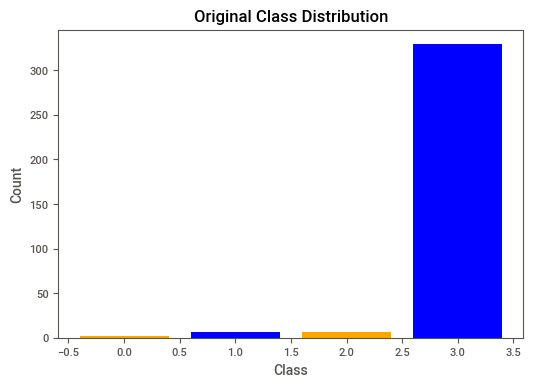

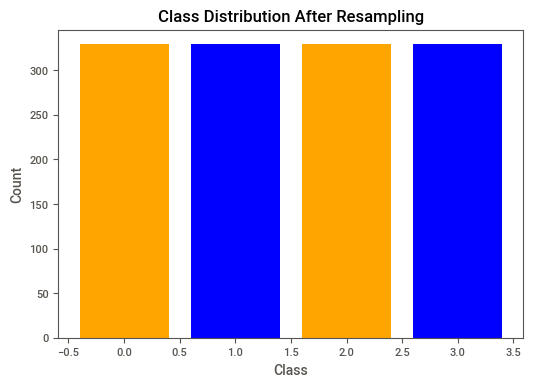

In [40]:
# Visualization of the Original Data

plt.figure(figsize=(6, 4))
plt.bar(y_train.unique(), y_train.value_counts(), color=['blue', 'orange'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



# Visualization of the Balanced Data

plt.figure(figsize=(6, 4))
plt.bar(y_resampled.unique(), y_resampled.value_counts(), color=['blue', 'orange'])
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Selection of Important Features in the Dataset 

In [41]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Initializing the RandomForest regressor
rf_model.fit(X_resampled,y_resampled)

RandomForestRegressor(random_state=42)

In [42]:
# Get feature importances

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [43]:
feature_importance_df

,Feature,Importance
10,gamma_glutamyl_transferase,0.598957
5,aspartate_aminotransferase,0.226370
0,age,0.066039
4,alanine_aminotransferase,0.048420
3,alkaline_phosphatase,0.031237
7,cholinesterase,0.011024
6,bilirubin,0.009147
8,cholesterol,0.002696
9,creatinina,0.002098
11,protein,0.001547


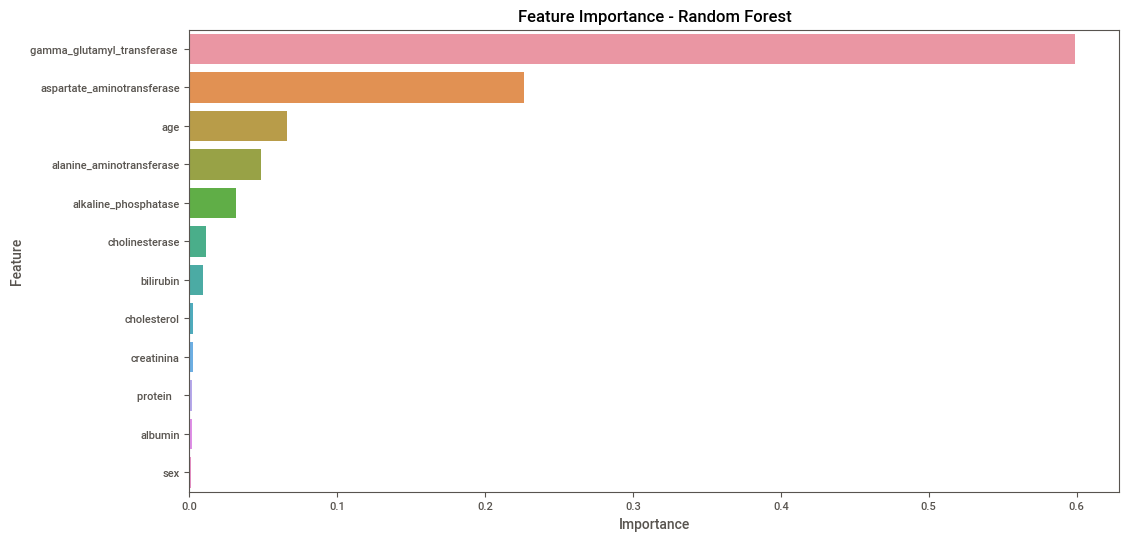

In [44]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

In [56]:
# Model Vaildation Techniques for the X_resampled, y_sampled 

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=40 )

In [57]:
X_train

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
243,61,1,38.900000,59.500000,22.800000,30.900000,6.300000,9.450000,5.230000,95.000000,20.300000,71.400000
808,59,1,44.094515,31.636990,9.199222,51.186658,12.322832,6.761416,4.601260,70.609452,64.240994,76.348074
1149,40,1,45.296877,39.160311,12.244064,44.891567,11.065621,10.041125,5.127811,71.277810,76.340927,74.739689
1058,34,1,45.689917,36.110842,7.710083,31.662017,9.775208,9.975121,5.425815,80.175930,35.361258,71.491471
100,63,1,40.800000,74.300000,25.000000,27.500000,5.500000,7.740000,6.350000,107.000000,50.400000,69.300000
...,...,...,...,...,...,...,...,...,...,...,...,...
1292,46,1,43.252109,40.673440,10.976307,40.679344,14.746205,9.730320,6.313777,73.772428,86.114921,73.226560
1016,34,1,46.906144,39.228067,15.773114,48.240444,8.281569,10.387286,4.231979,69.988393,67.017411,76.046928
165,33,0,36.900000,51.700000,17.400000,22.000000,8.300000,7.000000,5.020000,52.000000,19.100000,72.000000
7,40,0,39.900000,50.200000,14.900000,20.400000,5.100000,6.490000,4.920000,68.000000,24.100000,72.800000


In [58]:
X_test

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
597,59,0,40.633424,53.168129,22.728308,43.467392,16.570376,6.977833,4.621629,109.363391,122.843542,80.651299
386,52,0,39.176606,38.748103,3.616836,31.812851,20.521068,6.400044,3.870997,152.919770,140.374737,82.478494
279,59,1,45.300000,106.500000,13.500000,19.200000,6.900000,7.970000,4.860000,67.000000,15.700000,74.600000
425,56,0,39.975713,46.657909,14.100037,38.205707,18.353998,6.716978,4.282740,129.027823,130.758364,81.476224
975,56,0,40.070817,61.314398,37.743503,36.931361,10.267704,7.596070,4.951813,78.781946,82.072529,78.388171
...,...,...,...,...,...,...,...,...,...,...,...,...
248,43,0,33.700000,57.500000,15.100000,24.800000,6.900000,7.910000,5.370000,71.000000,46.000000,68.400000
583,59,0,40.800627,54.823152,24.921780,44.805013,16.116945,7.044147,4.707781,104.364315,120.831442,80.441587
1023,37,1,46.045445,38.606371,12.708176,46.433616,9.718199,10.154908,4.693642,70.364557,72.762774,75.293629
881,63,0,38.665656,37.883353,7.259758,40.567778,13.665656,7.301028,4.742329,70.186384,49.658405,68.823596


In [59]:
Y_train

243     3
808     1
1149    2
1058    2
100     3
       ..
1292    2
1016    2
165     3
7       3
219     3
Name: category, Length: 921, dtype: int32

In [60]:
Y_test

597     0
386     0
279     3
425     0
975     1
       ..
248     3
583     0
1023    2
881     1
2       3
Name: category, Length: 395, dtype: int32

### Model Building  

#### 1. Classification Decision Tree  (entropy)

In [61]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

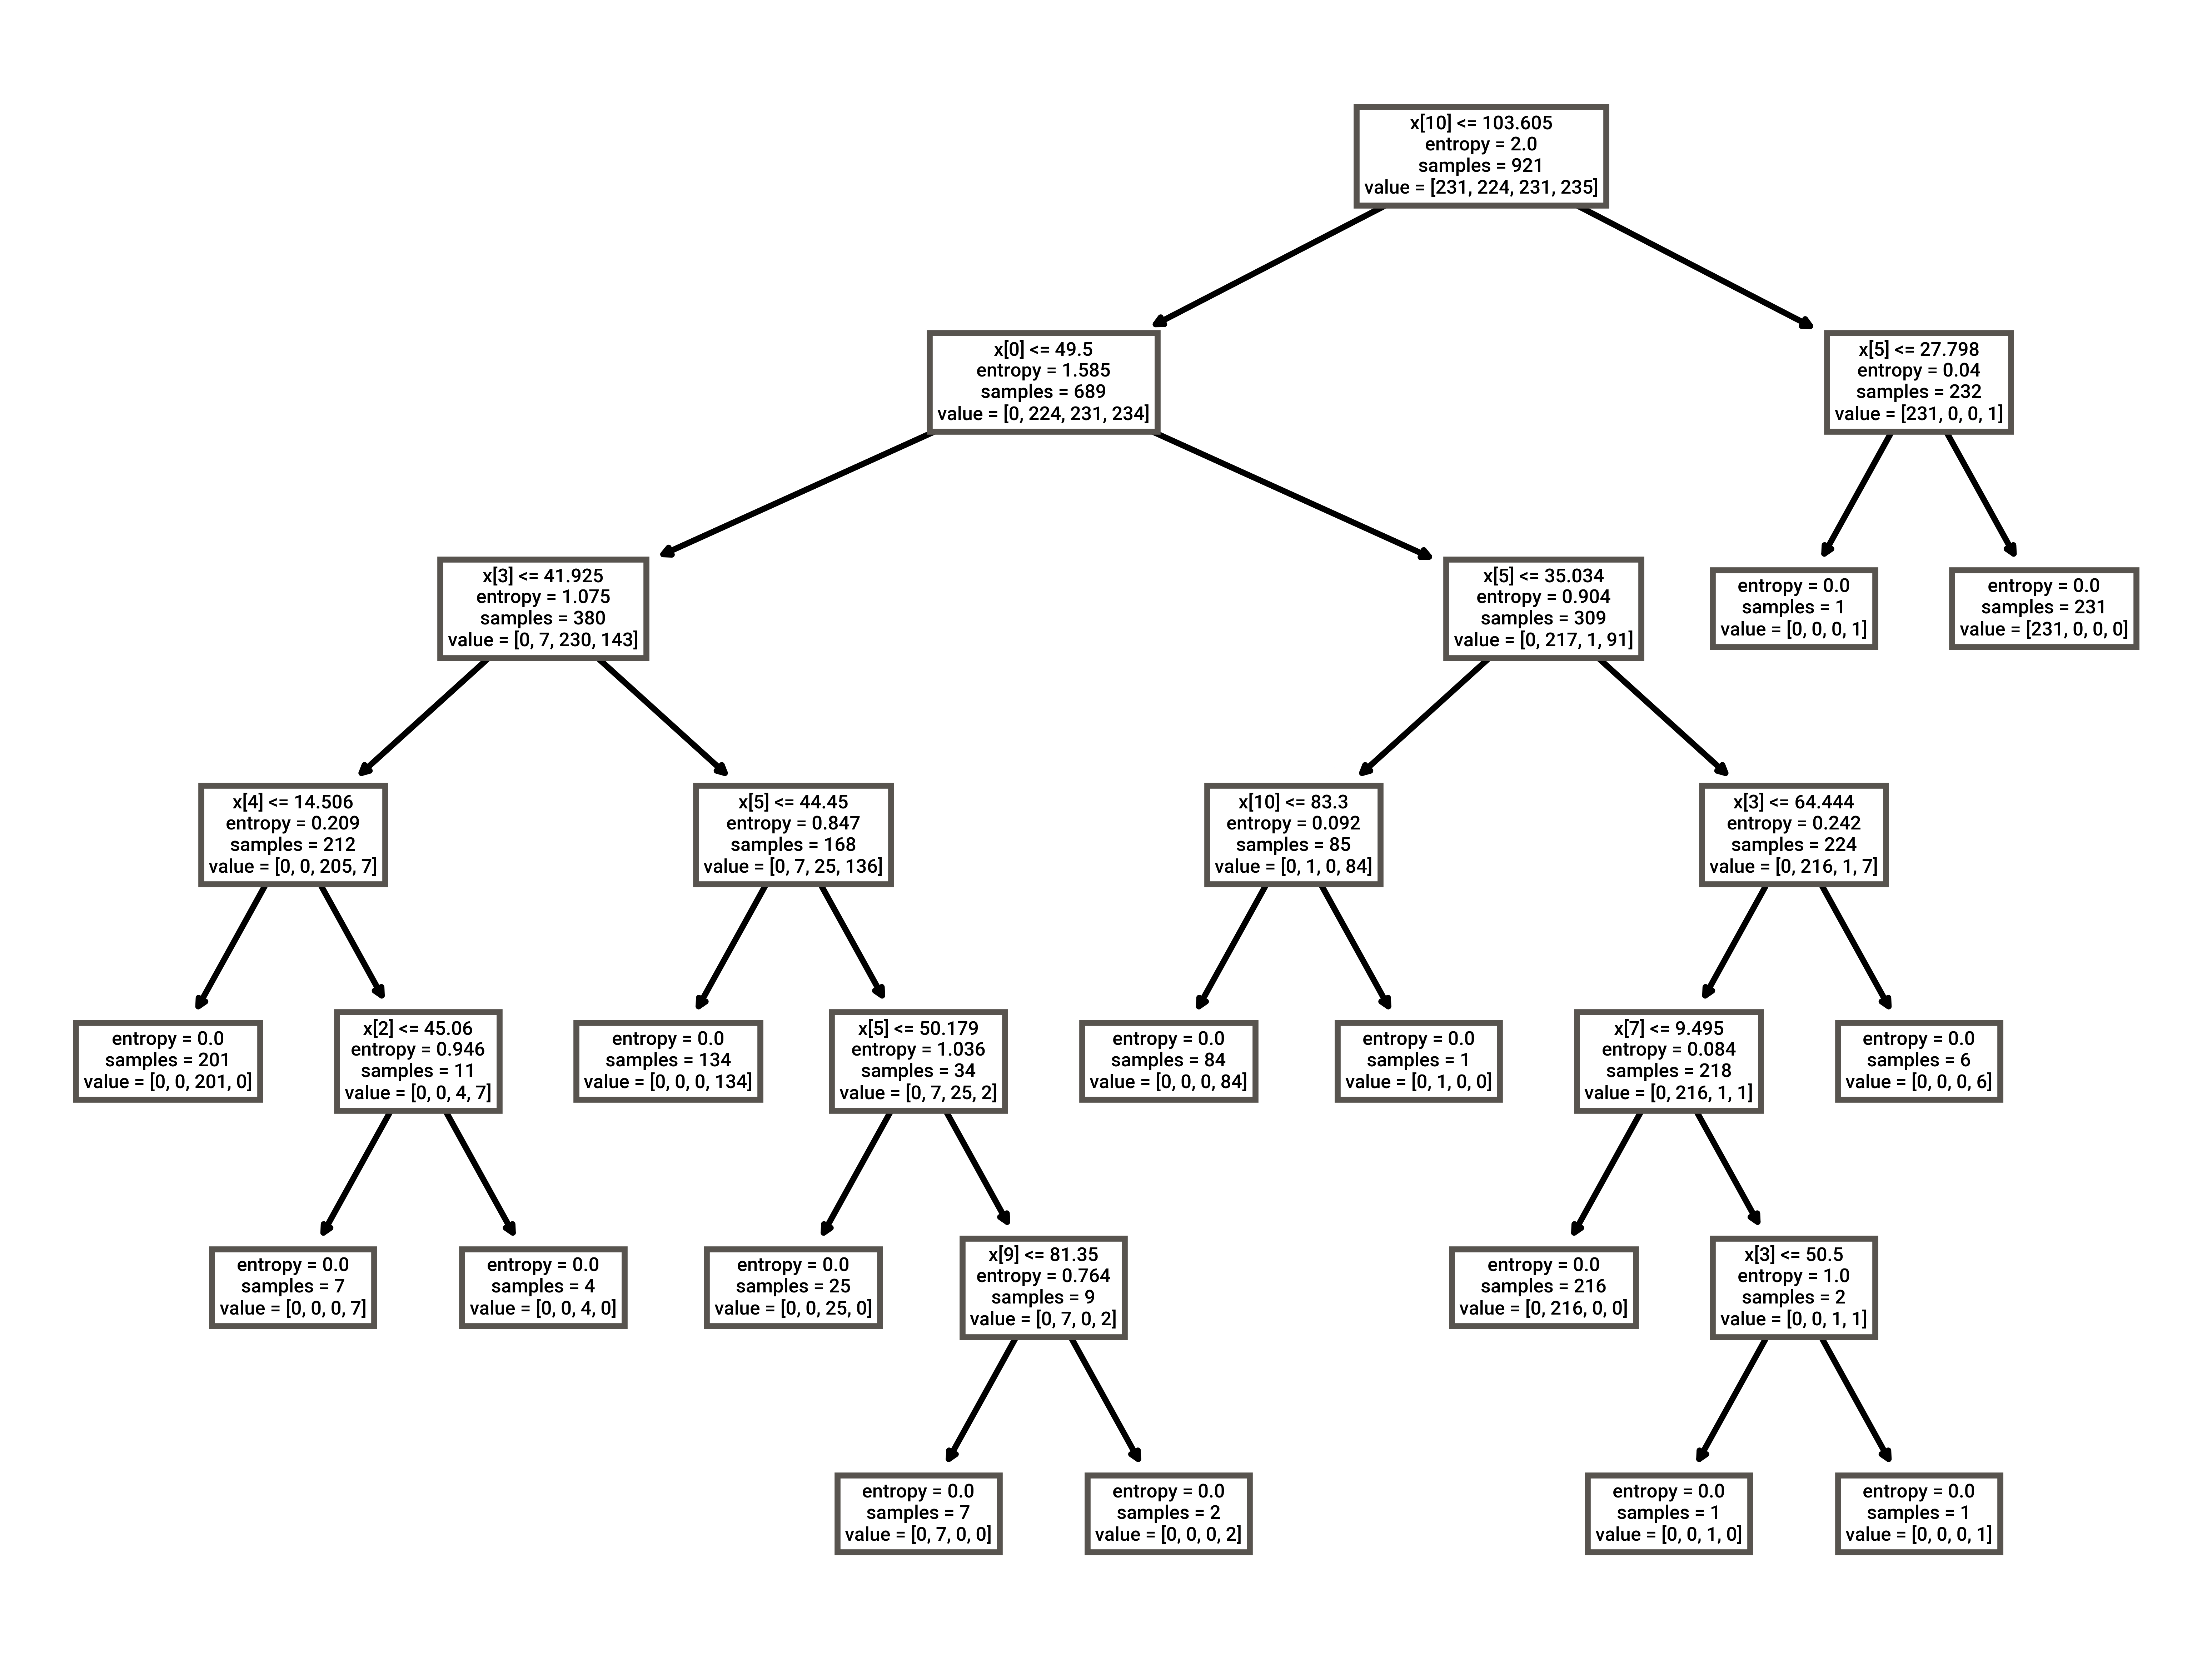

In [78]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [63]:
#Predicting on test data
preds = model.predict(X_test)
preds

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 3, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [64]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       0.96      1.00      0.98        98
           3       1.00      0.96      0.98        94

    accuracy                           0.99       395
   macro avg       0.99      0.99      0.99       395
weighted avg       0.99      0.99      0.99       395



In [65]:
# Accuracy
accuracy = accuracy_score(Y_test,preds)
print('Accuracy:', accuracy)

Accuracy: 0.9898734177215189


##### 1.1  Classification Decision Tree Gini

In [67]:
model2 = DecisionTreeClassifier(criterion = 'gini', max_depth = None)
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

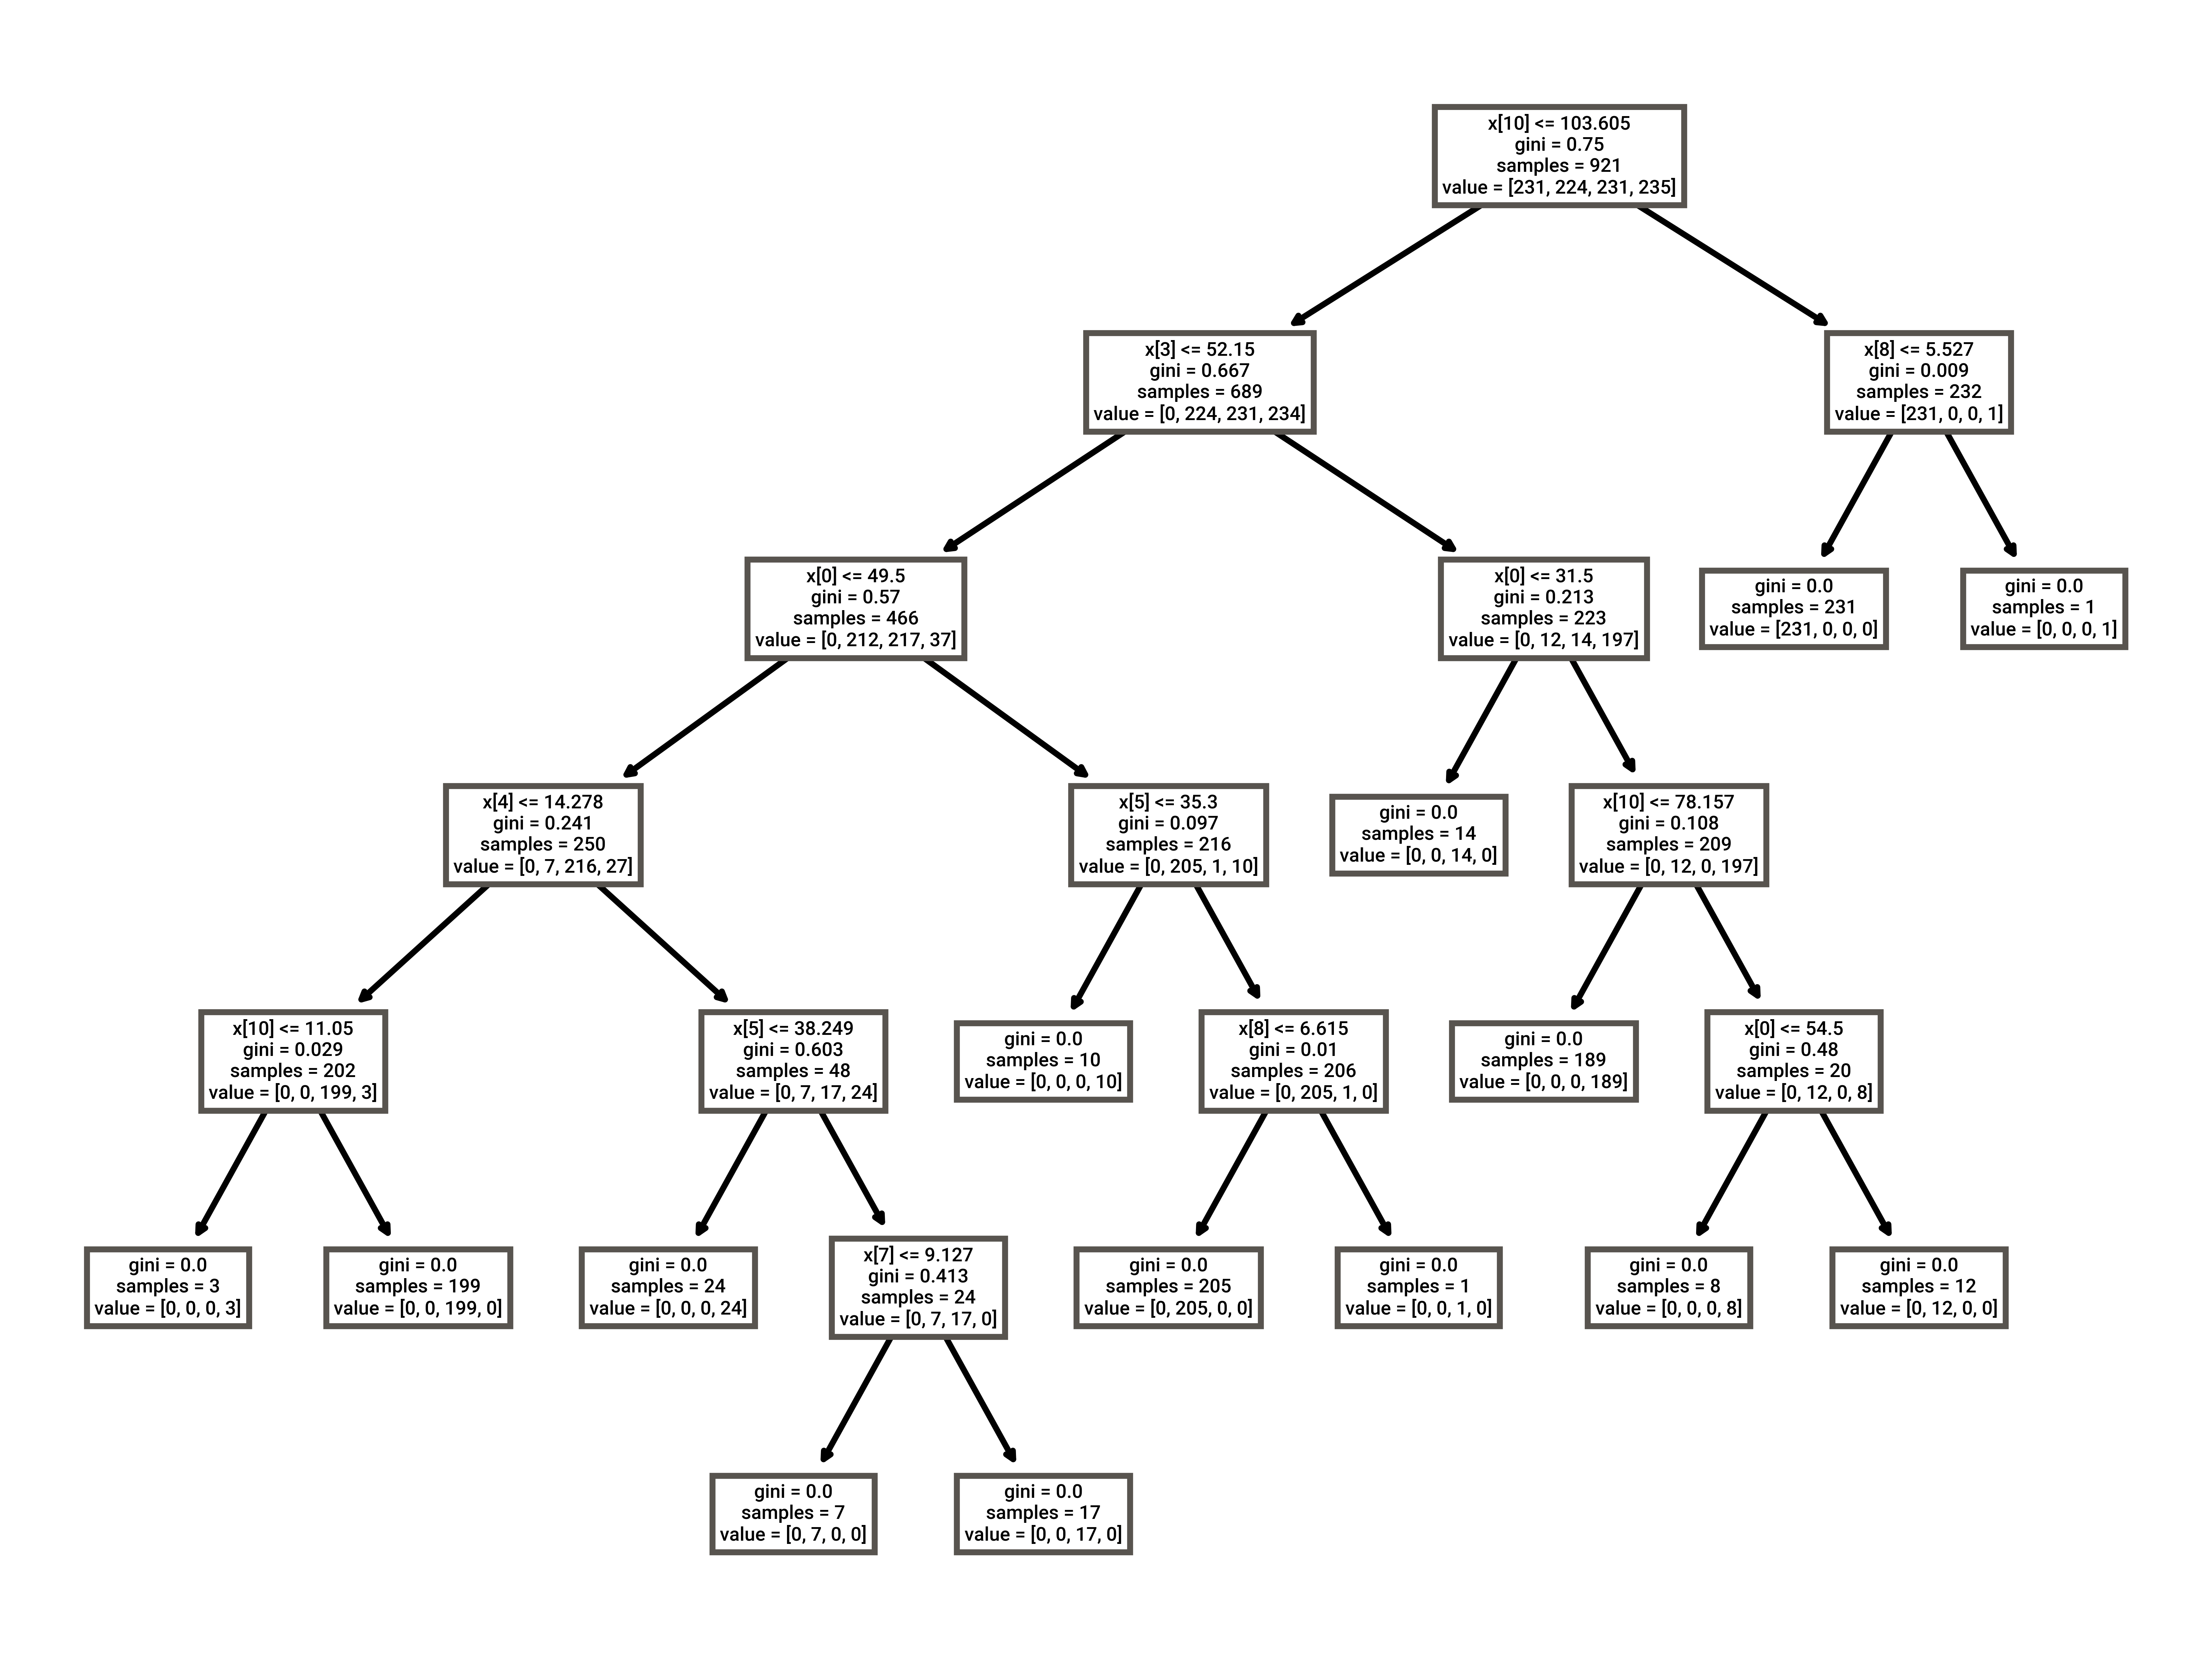

In [68]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model2);

In [69]:
#Predicting on test data
preds2 = model2.predict(X_test)
preds2

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 2, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [70]:
print(classification_report(Y_test,preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.98      1.00      0.99       105
           2       0.98      0.98      0.98        98
           3       0.98      0.96      0.97        94

    accuracy                           0.98       395
   macro avg       0.98      0.98      0.98       395
weighted avg       0.98      0.98      0.98       395



In [71]:
# Accuracy
accuracy2 = accuracy_score(Y_test,preds2)
print('Accuracy of Gini :', accuracy2)

Accuracy of Gini : 0.9848101265822785


#### 2. Random Forest  

In [72]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [80]:
# we need to give starting point to plot a Random Forest 
tree_to_plot = model3.estimators_[0]

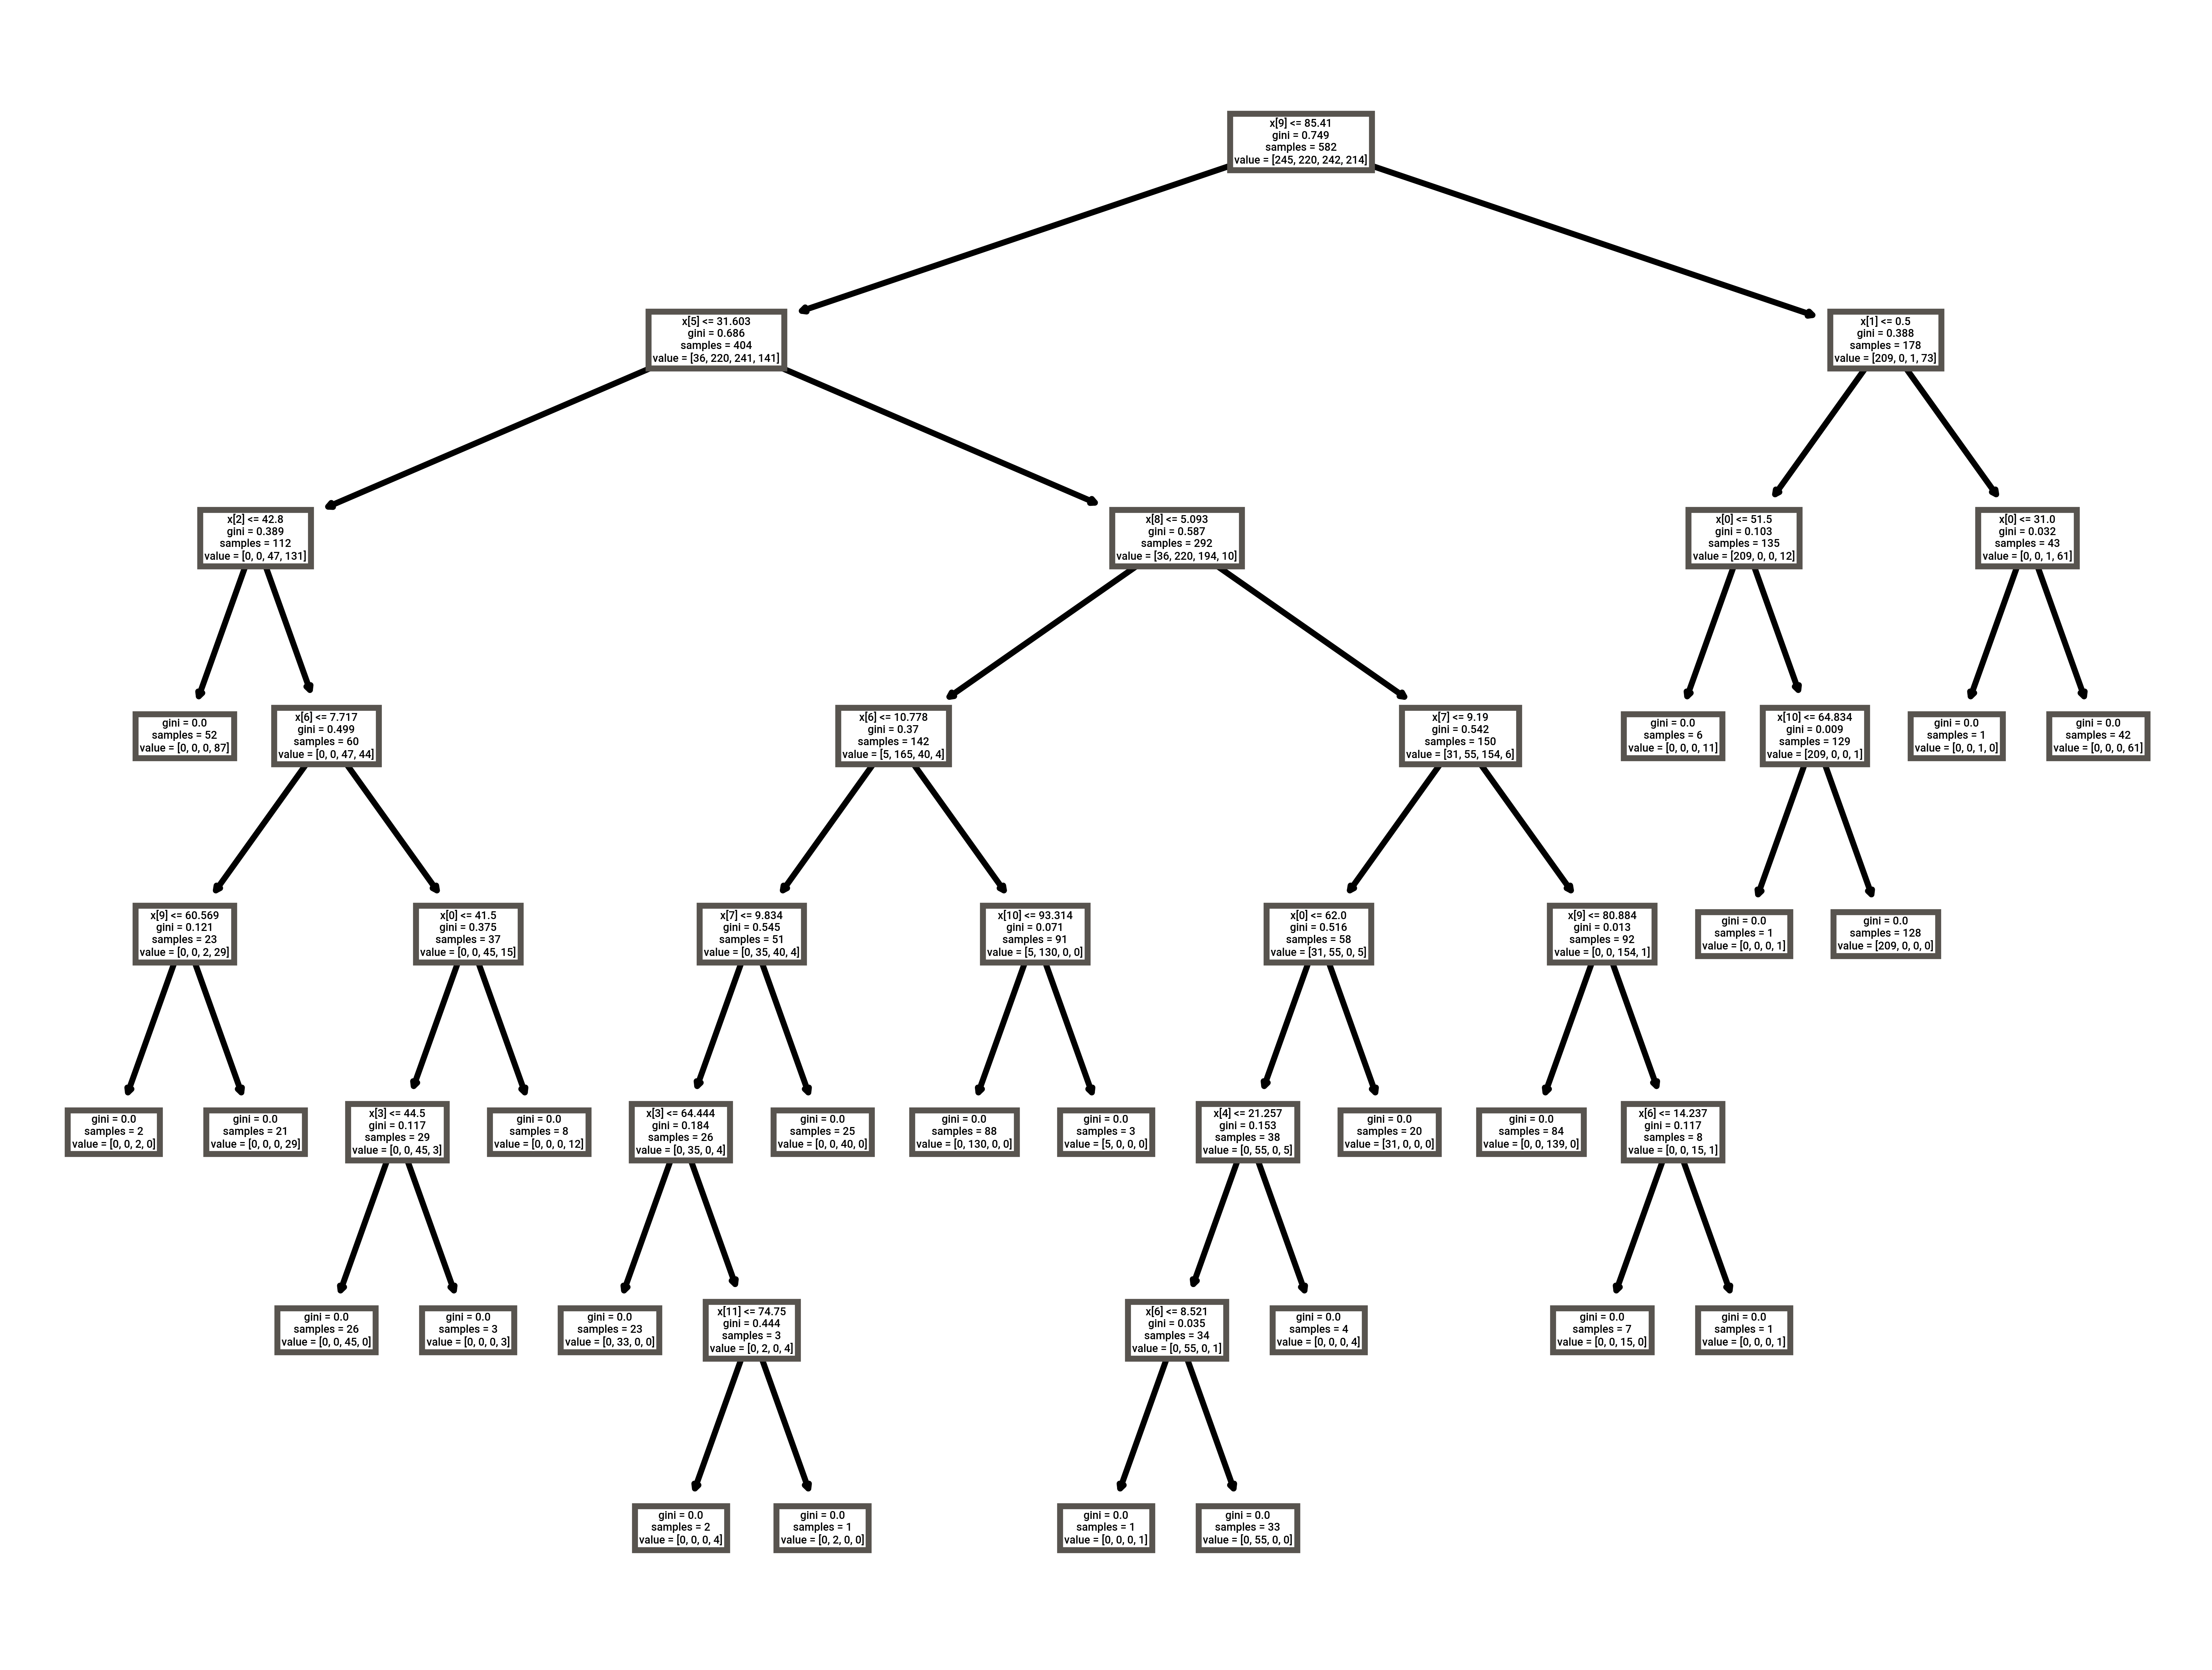

In [81]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(tree_to_plot);

In [82]:
#Predicting on test data
preds3 = model3.predict(X_test)
preds3

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 3, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [83]:
print(classification_report(Y_test,preds3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00        94

    accuracy                           1.00       395
   macro avg       1.00      1.00      1.00       395
weighted avg       1.00      1.00      1.00       395



In [84]:
# Accuracy
accuracy3 = accuracy_score(Y_test,preds3)
print('Accuracy of Random Forest :', accuracy3)

Accuracy of Random Forest : 1.0


##### 3. K Nearest Neighbors Classifier  (KNN)

In [86]:
model4=KNC(n_neighbors=2)
model4.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [88]:
#Predicting on test data
preds4 = model4.predict(X_test)
preds4

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 2, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [89]:
print(classification_report(Y_test,preds4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.98      1.00      0.99       105
           2       0.99      1.00      0.99        98
           3       1.00      0.97      0.98        94

    accuracy                           0.99       395
   macro avg       0.99      0.99      0.99       395
weighted avg       0.99      0.99      0.99       395



In [90]:
# Accuracy
accuracy4 = accuracy_score(Y_test,preds4)
print('Accuracy of K Nearest Neighbors Classifier :', accuracy4)

Accuracy of K Nearest Neighbors Classifier : 0.9924050632911392


##### 4. Support Vector Machine (SVM) 

In [93]:
model5 = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(model5,param_grid,cv=6,)
gsv.fit(X_train,Y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}])

In [94]:
# Finding the best kernel and gamma and C
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'rbf', 'gamma': 0.01, 'C': 10}, 1.0)

In [95]:
model5 = SVC(kernel='rbf',C=10)
model5.fit(X_train , Y_train)

SVC(C=10)

In [96]:
#Predicting on test data
preds5 = model5.predict(X_test)
preds5

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 3, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 2, 2, 2, 2, 1,

In [97]:
print(classification_report(Y_test,preds5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       0.99      1.00      0.99        98
           3       1.00      0.99      0.99        94

    accuracy                           1.00       395
   macro avg       1.00      1.00      1.00       395
weighted avg       1.00      1.00      1.00       395



In [98]:
# Accuracy
accuracy5 = accuracy_score(Y_test,preds5)
print('Accuracy of Support Vector Classifier :', accuracy5)

Accuracy of Support Vector Classifier : 0.9974683544303797


#### 5. XGBClassifier 

In [100]:
model6 = XGBClassifier(n_estimators=90,max_depth=3)
model6.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [101]:
#Predicting on test data
preds6 = model6.predict(X_test)
preds6

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 3, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [102]:
print(classification_report(Y_test,preds6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       0.99      1.00      0.99        98
           3       1.00      0.99      0.99        94

    accuracy                           1.00       395
   macro avg       1.00      1.00      1.00       395
weighted avg       1.00      1.00      1.00       395



In [103]:
# Accuracy
accuracy6 = accuracy_score(Y_test,preds6)
print('Accuracy of XGBClassifier :', accuracy6)

Accuracy of XGBClassifier : 0.9974683544303797


#### 6. Neural Network 

In [105]:
model7 = models.Sequential([layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                           layers.Dense(32, activation='relu'),
                           layers.Dense(1, activation='sigmoid')])

In [106]:
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
model7.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
26/26 [==============================] - 2s 19ms/step - loss: -30.6853 - accuracy: 0.2428 - val_loss: -65.8553 - val_accuracy: 0.2473
Epoch 2/10
26/26 [==============================] - 0s 5ms/step - loss: -88.6821 - accuracy: 0.2428 - val_loss: -163.0091 - val_accuracy: 0.2473
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: -205.8395 - accuracy: 0.2428 - val_loss: -339.2070 - val_accuracy: 0.2473
Epoch 4/10
26/26 [==============================] - 0s 5ms/step - loss: -418.3789 - accuracy: 0.2428 - val_loss: -690.6283 - val_accuracy: 0.2473
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: -804.7803 - accuracy: 0.2428 - val_loss: -1267.6993 - val_accuracy: 0.2473
Epoch 6/10
26/26 [==============================] - 0s 5ms/step - loss: -1410.6625 - accuracy: 0.2428 - val_loss: -2136.1484 - val_accuracy: 0.2473
Epoch 7/10
26/26 [==============================] - 0s 5ms/step - loss: -2281.5505 - accuracy: 0.2428 - val_loss: -3381.225

In [108]:
#Predicting on test data
preds7 = model7.predict(X_test)
preds7

13/13 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [109]:
# Accuracy
accuracy7 = accuracy_score(Y_test,preds7)
print('Accuracy of Neural Networks :', accuracy7)

Accuracy of Neural Networks : 0.26582278481012656


#### 7. Bagging Classifier 

In [111]:
model8 = BaggingClassifier(RandomForestClassifier(), n_estimators=100, random_state= 7)
model8.fit(X_train, Y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=7)

In [112]:
#Predicting on test data
preds8 = model8.predict(X_test)
preds8

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 3, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [113]:
# Accuracy
accuracy8 = accuracy_score(Y_test,preds8)
print('Accuracy of Bagging Classifier :', accuracy8)

Accuracy of Bagging Classifier : 1.0


#### 8. AdaBoost Classifier 

In [116]:
model_ada = AdaBoostClassifier(n_estimators=100)
model_ada.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100)

In [117]:
#Predicting on test data
preds_ada = model_ada.predict(X_test)
preds_ada

array([3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 1, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 1, 2,
       2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 1, 2, 3, 2, 2, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1,

In [118]:
# Accuracy
accuracy_ada = accuracy_score(Y_test,preds_ada)
print('Accuracy of AdaBoost Classifier :', accuracy_ada)

Accuracy of AdaBoost Classifier : 0.3367088607594937


#### 9. Gradient Boosting Classifier 

In [120]:
model_grad = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_grad.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [121]:
#Predicting on test data
preds_grad = model_grad.predict(X_test)
preds_grad

array([0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 3, 2, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 3, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1,

In [122]:
# Accuracy
accuracy_grad = accuracy_score(Y_test,preds_grad)
print('Accuracy of AdaBoost Classifier :', accuracy_grad)

Accuracy of AdaBoost Classifier : 0.9949367088607595


#### 10. Naive Bayes Classifier 

In [124]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train,Y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [125]:
#Predicting on test data
preds_NB = model_NB.predict(X_test)
preds_NB

array([0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       3, 2, 2, 2, 3, 0, 0, 3, 1, 1, 3, 3, 1, 3, 2, 1, 1, 0, 0, 1, 0, 2,
       3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 3, 2, 1, 1, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 2, 1, 0, 1, 1,
       0, 2, 2, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 3,
       0, 3, 0, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 3,
       3, 1, 3, 2, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0, 3, 2, 2, 1, 2,
       0, 3, 1, 1, 3, 3, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 3, 2, 2, 3,
       2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1,
       2, 0, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 0, 3, 0, 2, 1, 0, 2, 3, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 2, 2, 0, 0, 2, 3, 3, 3, 1, 3, 0,
       1, 0, 2, 1, 2, 3, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 2, 2, 2, 2, 1,

In [126]:
# Accuracy
accuracy_NB = accuracy_score(Y_test,preds_NB)
print('Accuracy of AdaBoost Classifier :', accuracy_NB)

Accuracy of AdaBoost Classifier : 0.9468354430379747
